In [1]:
import nltk
import string
from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Problem Statement

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.President Franklin D. Roosevelt in 1941

2.President John F. Kennedy in 1961

3.President Richard Nixon in 1973

In [2]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to C:\Users\AKHIL
[nltk_data]     MOHANDAS\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [3]:
roosevelt= inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')

### Find the number of Character, words & sentences in all three speeches

In [4]:
print("The number of character in Roosevelt speech is :",len(roosevelt))
print("The number of character in Kennedy speech is :",len(kennedy))
print("The number of character in Nixon speech is :",len(nixon))

The number of character in Roosevelt speech is : 7571
The number of character in Kennedy speech is : 7618
The number of character in Nixon speech is : 9991


In [5]:
def word(sentence):
    words = sentence.split()
    return len(words)

print("The number of words in Roosevelt speech is :",word(roosevelt))
print("The number of words in Kennedy speech is :",word(kennedy))
print("The number of words in Nixon speech is :",word(nixon))

The number of words in Roosevelt speech is : 1360
The number of words in Kennedy speech is : 1390
The number of words in Nixon speech is : 1819


In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to C:\Users\AKHIL
[nltk_data]     MOHANDAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

print("The number of sentences in the Roosevelt speech is:", count_sentences(roosevelt))
print("The number of sentences in the Kennedy speech is:", count_sentences(kennedy))
print("The number of sentences in the Nixon speech is:", count_sentences(nixon))

The number of sentences in the Roosevelt speech is: 68
The number of sentences in the Kennedy speech is: 52
The number of sentences in the Nixon speech is: 68


### Text cleaning

In [8]:
stop_words = set(stopwords.words('english') + list(string.punctuation))
stop_words.update(["--"])

In [9]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Function to apply stemming to a text
def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


In [10]:
def get_most_common_words(text, num_common=3):
    # Tokenize and clean the text
    words = nltk.word_tokenize(text.lower())
    cleaned_words = [word for word in words if word not in stop_words]
    
    # Count word frequencies
    word_freq = Counter(cleaned_words)
    
    # Get the most common words
    most_common_words = word_freq.most_common(num_common)
    return most_common_words

In [11]:
roosevelt_common = get_most_common_words(roosevelt)
kennedy_common = get_most_common_words(kennedy)
nixon_common = get_most_common_words(nixon)

# Print results
print("The 3 most common words in Roosevelt's speech are:")
for word, freq in roosevelt_common:
    print(f"{word}: {freq}")

print("\nThe 3 most common words in Kennedy's speech are:")
for word, freq in kennedy_common:
    print(f"{word}: {freq}")

print("\nThe 3 most common words in Nixon's speech are:")
for word, freq in nixon_common:
    print(f"{word}: {freq}")

The 3 most common words in Roosevelt's speech are:
nation: 12
know: 10
spirit: 9

The 3 most common words in Kennedy's speech are:
let: 16
us: 12
world: 8

The 3 most common words in Nixon's speech are:
us: 26
let: 22
america: 21


### Plot Word cloud of all three speeches

In [12]:
def preprocess_text(text):
    # Tokenize and clean the text
    words = nltk.word_tokenize(text.lower())
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

In [13]:
def generate_wordcloud(text, title):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [14]:
roosevelt_text = preprocess_text(roosevelt)
kennedy_text = preprocess_text(kennedy)
nixon_text = preprocess_text(nixon)

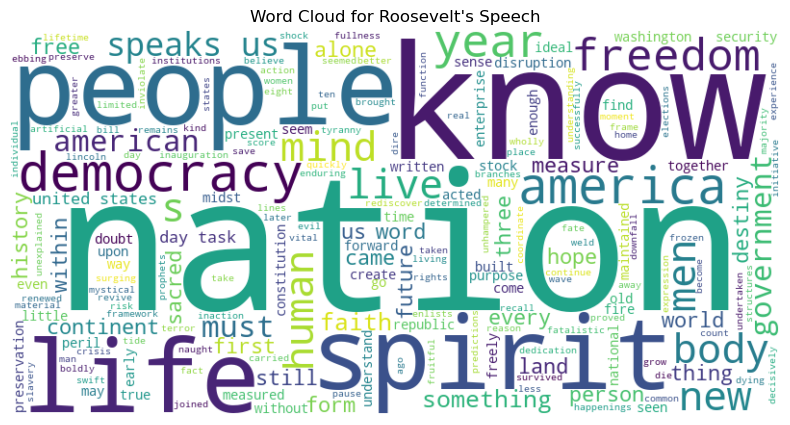

In [15]:
generate_wordcloud(roosevelt_text, 'Word Cloud for Roosevelt\'s Speech')

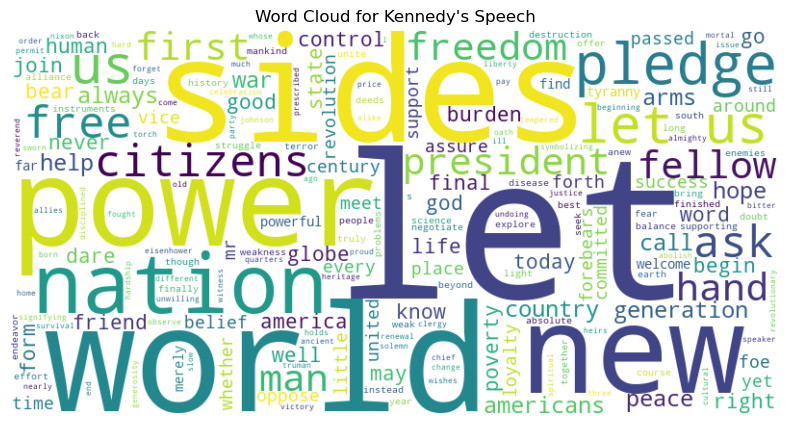

In [16]:
generate_wordcloud(kennedy_text, 'Word Cloud for Kennedy\'s Speech')

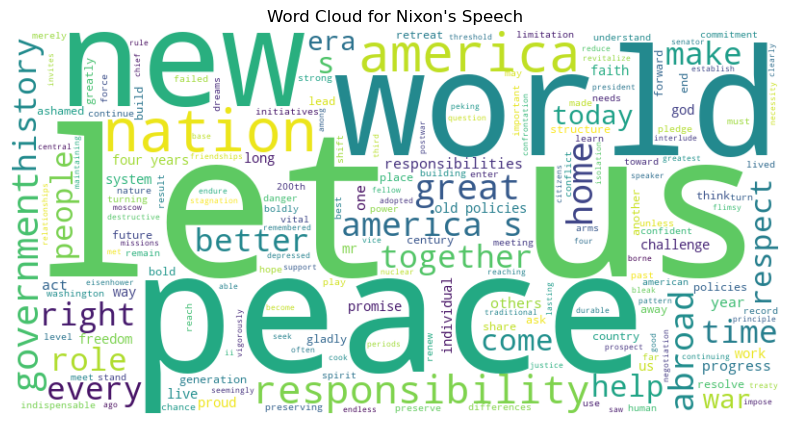

In [17]:
generate_wordcloud(nixon_text, 'Word Cloud for Nixon\'s Speech')